The Pyplot submodule
====================

As discussed, most of the tools that we need to create high quality graphics come from the pyplot submodule within Matplotlib. So, we'll need to import 
it.

In [1]:
from matplotlib import pyplot as pp

Here I am using the simple string "pp" to save time when namespacing the pyplot submodule. Pyplot has tools that allow us to 
create 1D and 2D plots, specify axis labels and titles, define legends, create and modify our axes, and more. In general, each of the actions that 
you would perform to create a plot are done on individual lines within your program. Let's explore this with some example data.

In [2]:
import numpy as np

def create_sawtooth(x,nmax):
    '''Create a sawtooth function on grid x using a fourier sine series of length nmax'''
    L     = 1                            # Length of the interval
    Sn    = np.zeros(len(x))+1/2         # Initialize series at 1/2

    #loop from 1 to the number of terms requested
    for n in range(1,nmax+1):             
        Sn += 1/(np.pi*n) * np.sin(n*np.pi*x/L)     
        
    return Sn

Here, I've defined a function that creates a sawtooth wave given a 1D grid (``x``) using a fourier sine series with including ``nmax`` terms.
The algorithm used to create the sawtooth wave is: 
\begin{align}
f(x) = \frac{1}{2}-\sum_{n=1}^{\infty}\frac{1}{n\pi}\sin\left(\frac{n\pi x}{L}\right)
\end{align}
where the function is approximate if the number of terms in the sum is not infinite.

With this function definition, I can solve for the value of my function at all points on a grid. 

In [3]:
x = np.linspace(-3, 3, 200)  # Create 300 points on the interval [-3L, 3L]
y = create_sawtooth(x,3)
print(y)

[0.5        0.47011843 0.44182028 0.41653354 0.39538938 0.37910753
 0.36791906 0.36153383 0.35915637 0.35954943 0.36114068 0.36216401
 0.36082408 0.35547019 0.34476496 0.32783308 0.30437698 0.27474865
 0.23997026 0.20170012 0.1621452  0.12392532 0.08989856 0.06296028
 0.04583081 0.04084784 0.04977953 0.07367295 0.11275005 0.16635984
 0.23299122 0.3103464  0.39547042 0.48492755 0.5750124  0.66198045
 0.74228134 0.81277824 0.87093738 0.91497438 0.94394706 0.95778877
 0.95728046 0.94396464 0.92000846 0.88802707 0.85088118 0.81146451
 0.77249729 0.73634134 0.70485011 0.6792643  0.66015967 0.64744962
 0.64044052 0.63793388 0.63836539 0.63996855 0.64094846 0.6396511
 0.63471375 0.62518434 0.61060014 0.59101973 0.56700645 0.53956538
 0.51004024 0.47997947 0.45098407 0.42455052 0.40192322 0.38396968
 0.37108977 0.36316775 0.35957184 0.35920217 0.3605839  0.36199812
 0.36164008 0.35779157 0.34899294 0.33420014 0.31291269 0.28526112
 0.25204527 0.21471856 0.17531793 0.13634329 0.10059464 0.07097

And as a result, I have a dataset to work with. This data is the numerical approximation of the fourier sine series for a sawtooth wave using only 3 terms. Since I got this data using the function that I created, it will be easy to change the approximation to use a different number of terms. Now, let's use pyplot to make a plot. The simplest way to do this is to use only 2 functions that are part of pyplot: ``plot()`` and ``show()``:

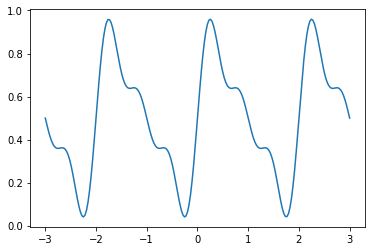

In [4]:
pp.plot(x,y)
pp.show()

``pp.plot()`` requires at least 1 argument, the dependent variable. Usually, we would also include the independent variable as I've done here. If you 
do not include the dependent variable, pyplot will plot your dependent variable as a function of the index number for each data point (e.g. 0,1,2,3,4,...,nmax), which is usually not what we want. The result of the ``pp.plot()`` function is the creation of a ``Figure`` object. At that point, while the object has been created, python needs additional instructions if you want to *see* the Figure. Essentially, there 
are two options: the ``pp.show()`` function opens up a graphical user interface (GUI) that displays the figure and allows you to manipulate it, save it, etc. Alternatively, we can use ``pp.savefig()`` to save the figure automatically and then view it with the appropriate piece of software. Pyplot 
can save figures in a number of different formats. I recommend creating png files:

In [ ]:
pp.savefig('sawtooth.png')

``pp.savefig()`` only requires a file path and it uses with extension that you specified and formats the figure accordingly. For example, I could have used the file path "/Users/dpawlows/sawtooth.pdf" to create a pdf file that is saved to my home directory. If I don't specify a directory, the file will be saved to the current working directory (CWD).

Let's return to the plot and make it look professional. Most importantly, we are axis labels. As mentioned, we can control 
this sort of thing by adding additional lines to our program.

**Note:** Due to the way that I am presenting this information, I'm going to call the plot function again. If this 
were being done in a file, you would call ``pp.plot()`` one time. You can call the labeling functions after an axis has been created (this happens automatically when you call ``pp.plot()``.

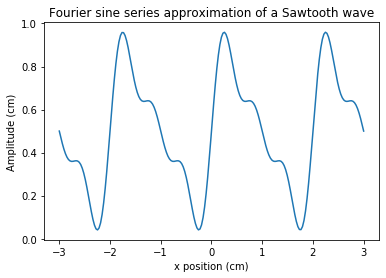

In [6]:
pp.plot(x,y)
pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.title('Fourier sine series approximation of a Sawtooth wave')
pp.show()

Just like that, we have a line plot that is ready for publication. Again, the goal of pyplot is simplicity. 

Optional plot arguments
-----------------------

There are some optional arguments that may come in handy when using the ``plot()`` function. The most commonly used ones are those that allow you to change the color of the line, marker, error bar, etc, the linestyle, add a label, 

### Color

There are several ways to change the color of your line. Pyplot offers a shortcut to quickly use one of 8 colors.

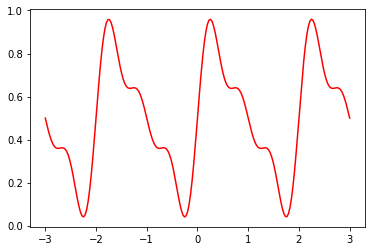

In [7]:
pp.plot(x,y,'r')
pp.show()

Here, a single character, 'r', is used to make the line red. The 8 options are 

| Character | Color |
|-----|------|
|'r' | Red |
| 'b' | Blue |
| 'g' | Green |
| 'c' | Cyan |
| 'm' | Magenta |
| 'y' | Yellow |
| 'k' | Black |
| 'w' | White |

Which are relatively easy to remember if you know a little color theory and two common [color models](https://en.wikipedia.org/wiki/Color_model): RGBW amd CMYK

Of course, pyplot has the ability to render many more colors than that. To access those, it is necessary to use the 
``color`` keyword instead of the shortcut above. You can set ``color`` in 3 ways. Most simply, you can use any of many [legal names](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), such as ``color = blue`` or ``color = hotpink``. For 
even more control, you can use an [html hex string](https://htmlcolorcodes.com/): ``color = '#33ff80'``. Or, if you 
think in terms of RGB, you can specify an RGB tuple where each value of RGB is specified between 0 and 1: ``color = (.1,.05,1)``

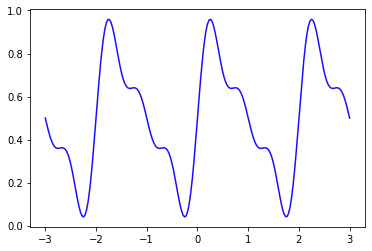

In [8]:
pp.plot(x,y,color=(.1,.05,1))
pp.show()

### Markers

For both line plots and scatter plots, it is possible to specify marker size, shape and color. Use the ``marker`` keyword to specify [shape](https://matplotlib.org/3.1.3/api/markers_api.html), the ``markersize`` keyword to specify size (note that the 
number used to specify size roughly translates to the area of the marker in points), and the 
``markerfacecolor`` keyword to specify color:

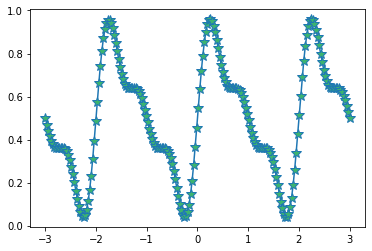

In [9]:
pp.plot(x,y,marker='*',markersize=10,markerfacecolor='mediumseagreen')
pp.show()

### Lines

We can also use keyworded argument to modify the lines that we plot. The two most common keywords are ``linestyle`` where one can specify either a linestyle name or a linestyle code (see the [linestyle options](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)) and ``linewidth``.

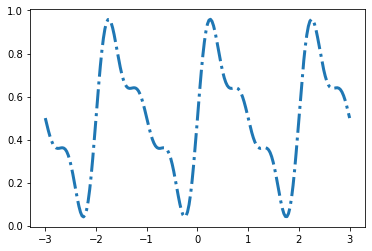

In [10]:
pp.plot(x,y,linestyle='dashdot',linewidth=3)
pp.show()

### Labels

Finally, for every line that we plot, we can add a label:

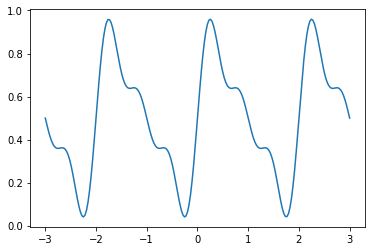

In [11]:
pp.plot(x,y,label="3 terms")
pp.show()

Note that including a label doesn't change the plot. Instead it attaches the label to the line in the code itself which allows us to include a legend after we call the ``plot()`` function.

Plotting multiple lines
-----------------------

Plotting a second (or third, or tenth) line is just as easy as plotting one. We simply need to call ``plot()`` multiple 
times. To demonstrate, let's get additional data using ``create_sawtooth()``.

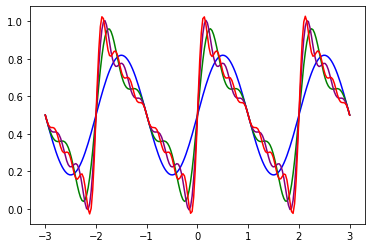

In [12]:
y1 = create_sawtooth(x,1)
y2 = create_sawtooth(x,3)
y3 = create_sawtooth(x,5)
y4 = create_sawtooth(x,7)
pp.plot(x,y1,color='blue',label="1 term")
pp.plot(x,y2,color = 'green',label = "3 terms")
pp.plot(x,y3,color = 'purple',label = "5 terms")
pp.plot(x,y4,color = 'red',label = "7 terms")
pp.show()

Pretty easy! This is a good time to remind you about the anatomy of a figure. The first time we called ``plot()``, python created a ``Figure`` object and an ``Axis`` object. When we called ``plot()`` again, pyplot used the same ``Figure`` and ``Axis`` when it drew additional lines. This is the default behavior. However, we could have used the ``pp.figure()`` function in between each call to ``plot()`` to draw the next line on a new figure if we didn't want them all on the same one.

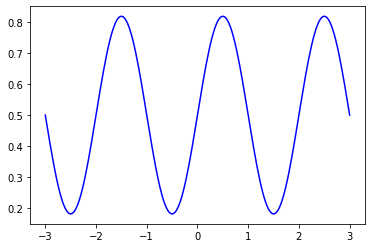

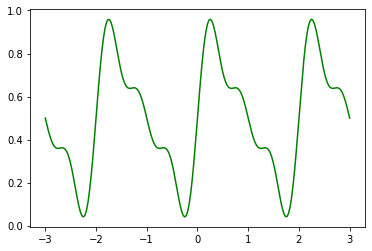

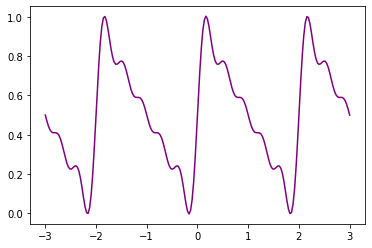

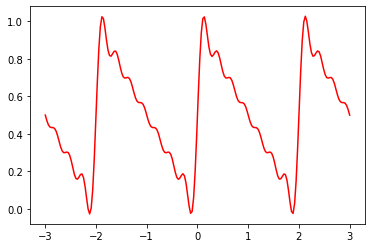

In [13]:
pp.plot(x,y1,color='blue',label="1 term")
pp.figure()
pp.plot(x,y2,color = 'green',label = "3 terms")
pp.figure()
pp.plot(x,y3,color = 'purple',label = "5 terms")
pp.figure()
pp.plot(x,y4,color = 'red',label = "7 terms")
pp.show()

In this case, adding labels to one figure only affects that one figure:

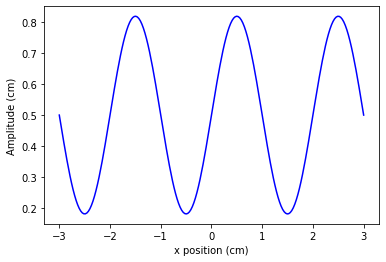

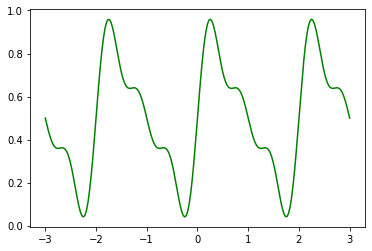

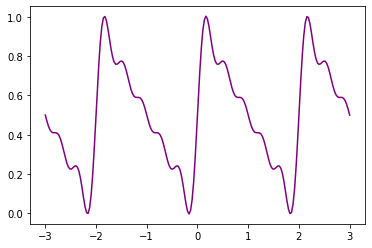

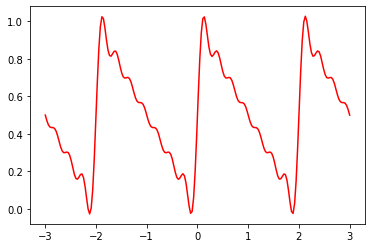

In [14]:
pp.plot(x,y1,color='blue',label="1 term")
pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.figure()
pp.plot(x,y2,color = 'green',label = "3 terms")
pp.figure()
pp.plot(x,y3,color = 'purple',label = "5 terms")
pp.figure()
pp.plot(x,y4,color = 'red',label = "7 terms")
pp.show()

I point all of this out to demonstrate that we have a lot of control over how we are producing graphics. The beauty of 
all of this is that we can really make our code very neat and organized, while following the good coding practice of not copying 
similar code when we could instead use recursion. As a last example, let's recreate the plot above with 4 lines in it in a much more efficient way, and demonstrate how to use the ``pp.label()`` function:

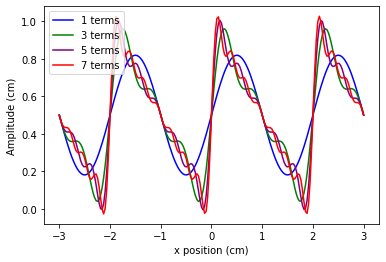

In [15]:
### Making a nice plot the right way
numberOfTerms = [1,3,5,7]
colors = ['blue','green','purple','red']

i = 0
for n in numberOfTerms:
    y = create_sawtooth(x,n)
    pp.plot(x,y,color=colors[i],label="{} terms".format(n))
    i+=1

pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.legend(loc="upper left")
pp.show()

Now that is a nice looking plot! And, unlike the earlier example, I'm not using nearly identical lines of text. Also, notice that when I write the code this way, it is very, very easy to change it do do things like print additional terms (I only have to modify 2 lines) or plot the results of a different analysis (I just have to make a new function and replace "create_sawtooth()" with it).

Error bars
----------

Lastly, in the sciences we always need to quantify any uncertainty in a measurement. One of the ways that we visualize 
this uncertainty is through the use of error bars. In order to include a plot with error bars, pyplot requires that we 
use the ``pp.errorbar()`` function instead of the ``pp.plot()`` function. This function gives us access to 
two important keywords: ``yerr`` and ``xerr`` that allow us to specify the error bar values. Like everything, there are several ways to specify those values: 1) Using a constant value that applies to all data points, 2) Using a single 1D array which specifies the symmetric error for each data point independently, or 3) Using a single 2D array that specifies the "up" error and "down" error separately for each data point. Let's look at examples:

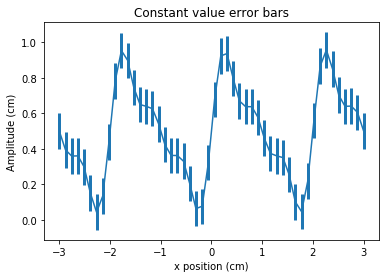

In [16]:
x = np.linspace(-3, 3, 50)  # Create 300 points on the interval [-3L, 3L]
y = create_sawtooth(x,3)
yerror = 0.1    # All values have an uncertainty of 0.05 cm
pp.errorbar(x,y,yerr=yerror,linestyle=None,elinewidth=3)
pp.title("Constant value error bars")
pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.show()

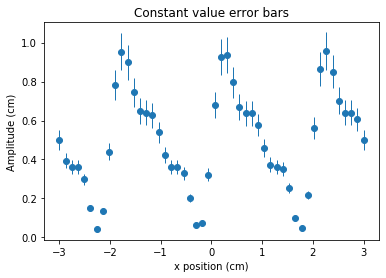

In [17]:
yerror = 0.1*y   # All values have an uncertainty of 10%
pp.errorbar(x,y,yerr=yerror,elinewidth=1,fmt="o")
pp.title("Constant value error bars")
pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.show()

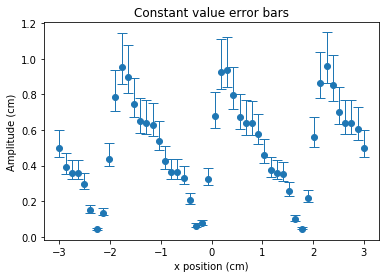

In [18]:
yerrorup = 0.2*y   # All values have an uncertainty of 20% upwards
yerrordown = 0.1*y   # All values have an uncertainty of 10% upwards
yerror = np.array([yerrordown,yerrorup])
pp.errorbar(x,y,yerr=yerror,elinewidth=1,fmt="o",capsize=5)
pp.title("Constant value error bars")
pp.xlabel('x position (cm)')
pp.ylabel('Amplitude (cm)')
pp.show()

In the last example, ``yerror`` is a 2D numpy array of shape (2,len(y)):

In [19]:
print(yerror)
print("shape: {}".format(np.shape(yerror)))

[[0.05       0.03942479 0.03590846 0.03601863 0.02976638 0.01501742
  0.00424812 0.01340151 0.0438971  0.07825173 0.09541858 0.08991796
  0.0745545  0.06495497 0.06397366 0.06261488 0.05401512 0.04235452
  0.03626176 0.03621082 0.03299924 0.0203571  0.00626556 0.00760743
  0.03215437 0.06784563 0.09239257 0.09373444 0.0796429  0.06700076
  0.06378918 0.06373824 0.05764548 0.04598488 0.03738512 0.03602634
  0.03504503 0.0254455  0.01008204 0.00458142 0.02174827 0.0561029
  0.08659849 0.09575188 0.08498258 0.07023362 0.06398137 0.06409154
  0.06057521 0.05      ]
 [0.1        0.07884959 0.07181692 0.07203727 0.05953275 0.03003484
  0.00849624 0.02680302 0.08779419 0.15650346 0.19083717 0.17983592
  0.14910901 0.12990994 0.12794732 0.12522977 0.10803025 0.08470903
  0.07252353 0.07242164 0.06599848 0.04071419 0.01253112 0.01521486
  0.06430873 0.13569127 0.18478514 0.18746888 0.15928581 0.13400152
  0.12757836 0.12747647 0.11529097 0.09196975 0.07477023 0.07205268
  0.07009006 0.05089099 

So in this exampe, two 50 element arrays are "stacked" on top of one another. The 1st 50 element array corresponds to the 
"down" error for each data point, while the 2nd 50 element array corresponds to the "up" error for each data point.

Finally, note that the ``xerr`` keyword allows us to control the error bars for the independent variable. All of the ``plot()`` function parameters that were discussed above can still be used to control the lines and markers, including color, size, shape, etc. Also, there are a variety of parameters that can be tweaked to make your error bars look 
how you want. I've demonstrated a few here, but check out [the documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.errorbar.html) for more information. 